In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
mpl.rc('font', size=13)
mpl.rc('axes', labelsize='large')
mpl.rc('xtick', labelsize='large')
mpl.rc('ytick', labelsize='large')

plt.rcParams['figure.figsize'] = [20, 10] # For larger plots

In [2]:
df_IR = pd.read_stata("./Data/DHS/BJIR71DT/BJIR71FL.DTA", convert_categoricals=False)
# smaller dataset


In [119]:
# Important variables
# background

edu = 'v106'
violence_justified = 'v744' # a-e
age = 'v012'
age_group = 'v013'
litteracy = 'v155'
media_paper = 'v157'
media_radio = 'v158'
media_tv = 'v159'
sample_weight = 'v005' # must be divided by 1e6
ever_married = 'v020'
# residence = 'v025'
time2water = 'v115'

has_elec = 'v119'
has_radio = 'v120'
has_tv = 'v121'

has_fridge='v122'
has_bicycle = 'v123'
has_moto = 'v124'
has_car = 'v125'
religion = 'v130'
ethnicity = 'v131'
place_of_residence = 'v134'
edu_attainment = 'v149'
relation2household_head='v150'
sex_household_head = 'v151'
age_household_head = 'v152'

has_phone_landline='v153'
has_phone_mobile='v169a'
use_internet = 'v171a'
use_internet_last_month = 'v171b'
wealth_index = 'v191'

total_child_born = 'v201'
num_sons_died = 'v206'
num_daughters_died = 'v207'
num_dead_child = 'num_dead_child'
num_living_child = 'v218'


selected_for_dom_violence_interview = 'v044'

husband_edu_level = 'v701'# 's904'
husband_occupation = 's908a'
resp_occupation = 's913a'

# Domestic violence
is_currently_in_union= 'v502'
weight_dom_violence = 'd005'
num_control_issues = 'd102'
emotional_violence = "d103" # a-f
emotional_violence_any ='d104'
physical_violence = 'd105' # a-n detailed acts of violence
physical_violence_less_severe = 'd106'
physical_violence_severe = 'd107'
sexual_violence = 'd108'

violence = 'violence'
# any_violence = 'd105' or 'd106' or 'd107'

violence_to_husband ='d112'
partner_drinks_alcohol='d113'
partner_drinks_alcohol_freq = 'd114'
sought_help = 'd119' # a to xk; y=no one
mother_beaten = 'd121'


edu_w = 'v106' # education level women, value =0-3
edu_m = 'mv106' # education level men, 
#Age (v012) is recorded in
#completed years, and is typically reported in 5-year groups (v013). 
# age_group_w = "v013"
# Info for men is in the Men's individual recode (MR) dataset



list_col = ['caseid', 'v000', sample_weight,
            edu, age, age_group, litteracy,
            media_paper, media_radio, media_tv,
            ever_married, 
            has_elec, has_radio, has_tv, has_fridge, has_bicycle, has_car, has_moto, 
            has_phone_landline, has_phone_mobile,
            religion, ethnicity,
            place_of_residence, age_household_head,
            relation2household_head,
            wealth_index,
            total_child_born, num_living_child, 
            
            husband_edu_level, husband_occupation, resp_occupation,
            
            
            selected_for_dom_violence_interview, weight_dom_violence,
            is_currently_in_union, num_control_issues, emotional_violence_any, 
            physical_violence_less_severe, physical_violence_severe, sexual_violence,
            partner_drinks_alcohol, partner_drinks_alcohol_freq, #sought_help,
            mother_beaten
           ]
list_col += [violence_justified + letter for letter in 'abcde']
list_col += [emotional_violence + letter for letter in 'abcdef']
list_col += [physical_violence + letter for letter in 'abcdefghijkn']

violence_justified_sum = "violence_justified_sum"
emotional_violence_sum = "emotional_violence_sum"
physical_violence_sum = "physical_violence_sum"



df = df_IR[list_col].copy()
df[num_dead_child] = df[total_child_born] - df[num_living_child]
df = df[df[is_currently_in_union]==1]

df[violence_justified_sum] = df[[violence_justified + letter for letter in 'abcde']].sum(axis=1)
df[emotional_violence_sum] = df[[emotional_violence + letter for letter in 'abcdef']].sum(axis=1)
df[physical_violence_sum] = df[[physical_violence + letter for letter in 'abcdefghijkn']].sum(axis=1)



In [120]:
# aggregate_columns
df[violence_justified] = df[[violence_justified + letter for letter in 'abcde']].sum(axis=1)>0
df[violence] = df[[physical_violence_less_severe, physical_violence_severe, sexual_violence]].sum(axis=1)>0


df[violence_justified + '_weighted'] = df[violence_justified]*df[sample_weight]/1e6
df[violence + '_weighted'] = df[violence]*df[sample_weight]/1e6



<AxesSubplot:xlabel='v701', ylabel='v106'>

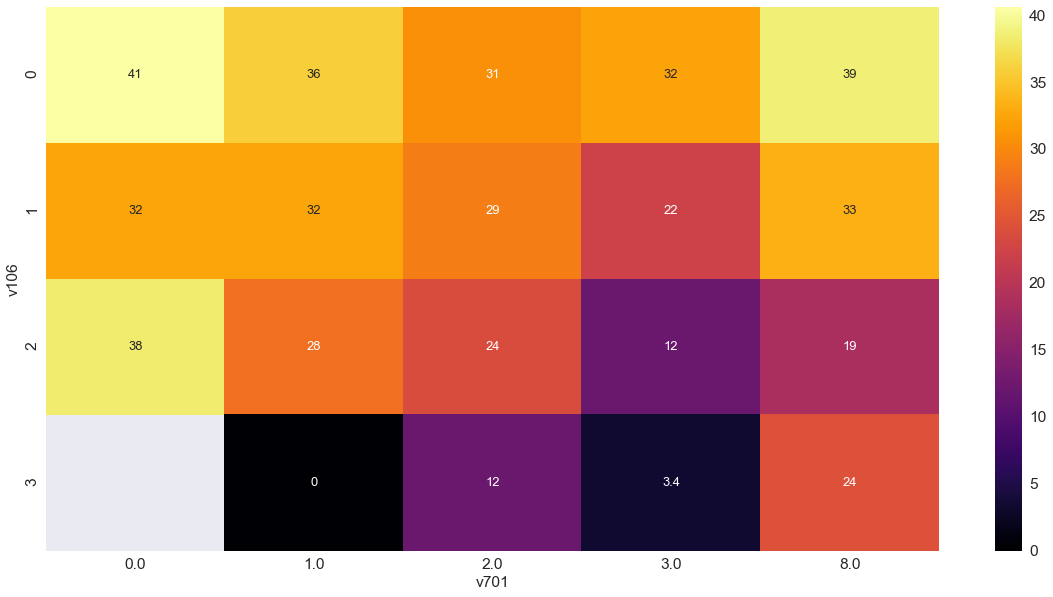

In [121]:
temp = df.pivot_table(index=edu, columns=husband_edu_level, values=violence_justified + '_weighted')
sns.heatmap(temp*100,cmap='inferno', annot=True)

<AxesSubplot:xlabel='v701', ylabel='v106'>

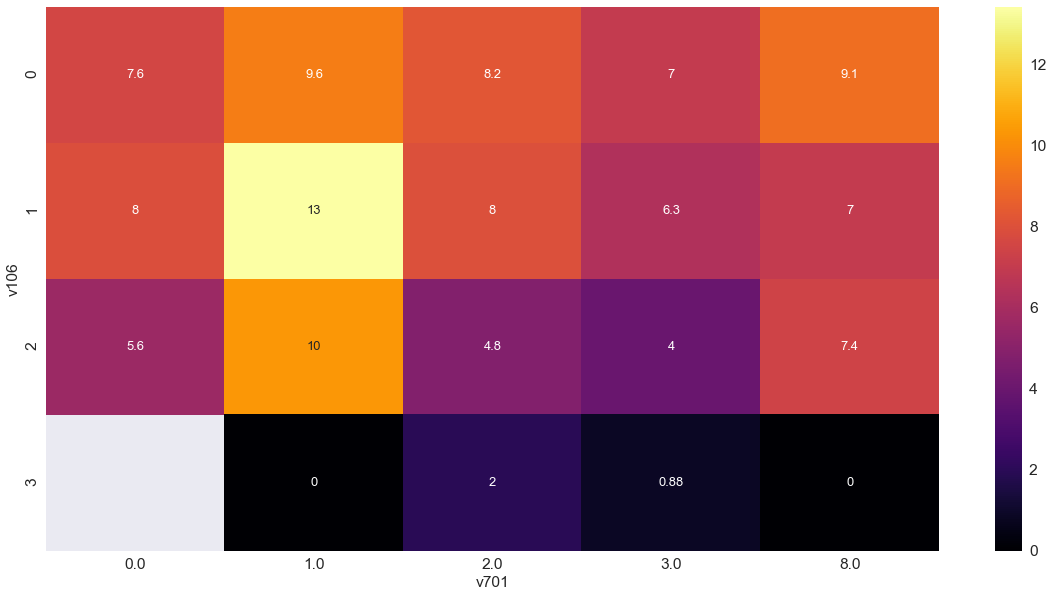

In [122]:
temp = df.pivot_table(index=edu, columns=husband_edu_level, values=violence + '_weighted')
sns.heatmap(temp*100,cmap='inferno', annot=True)

In [123]:
violence_vs_just = "violence_vs_just"
df[violence_vs_just] = (df[violence_justified]*2**0 +  df[violence]*2**1).astype(int)

<AxesSubplot:xlabel='v106', ylabel='count'>

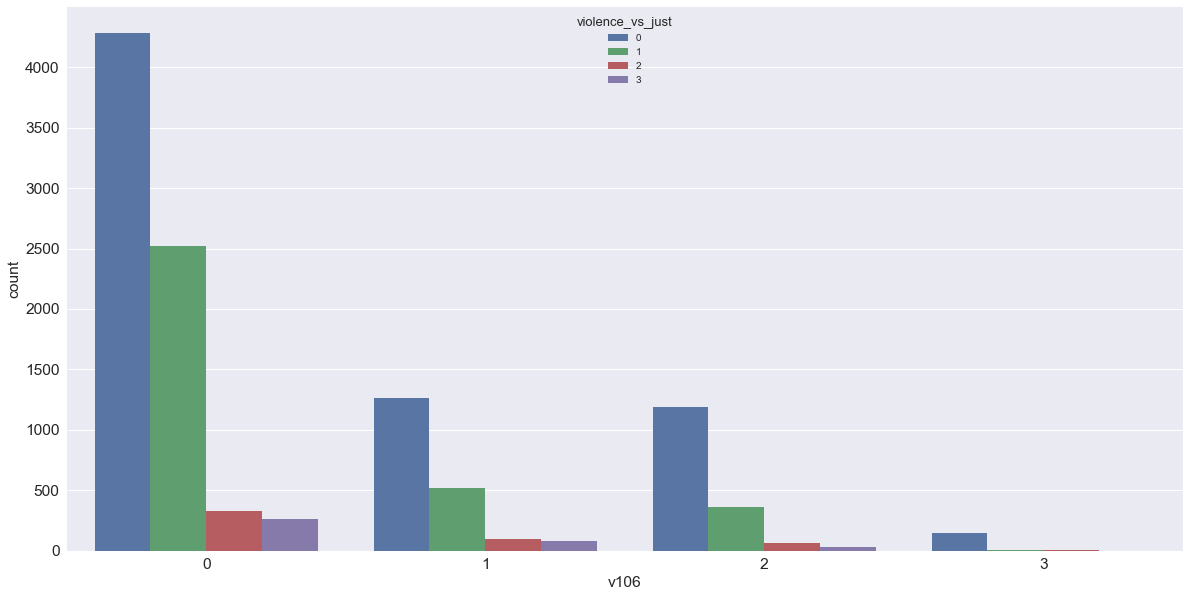

In [124]:
sns.countplot(data=df, x=edu, hue=violence_vs_just)

In [125]:
temp = df[[violence,violence_justified]].pivot_table(index=violence, columns=violence_justified, aggfunc='count')
# temp = df.pivot_table(index=edu, columns=husband_edu_level, values=violence_justified + '_weighted')
# sns.heatmap(temp)
temp

violence
False
True


In [126]:
# pd.get_dummies(df[[violence_vs_just]].astype('category'))
temp = pd.get_dummies(df[[violence, violence_justified]].astype('category'))
temp
# temp.pivot_table()

,violence_False,violence_True,v744_False,v744_True
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
15918,1,0,1,0
15921,1,0,0,1
15923,1,0,0,1
15924,1,0,0,1


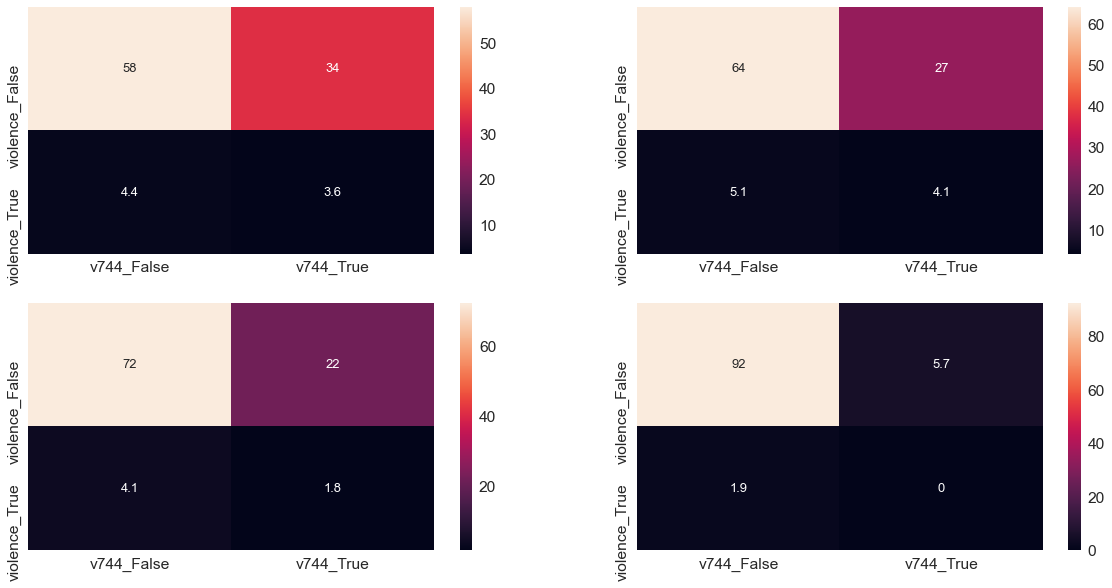

In [127]:
# Perception vs experience of violence

temp_0 = pd.get_dummies(df[[violence, violence_justified]].astype('category'))
temp_0[edu] = df[edu]

for i_edu in range(4):
    plt.subplot(2,2,i_edu+1)
    temp = temp_0[temp_0[edu]==i_edu]
    index = ['violence_False', 'violence_True']
    columns = ['v744_False','v744_True']
    temp_pivot = pd.DataFrame(np.zeros((2,2)), index=index, columns=columns)
    temp_pivot
    n = temp.shape[0]
    for ind in index:
        for col in columns:
    #         print(((temp[ind] + temp[col])>0).mean())
            temp_pivot.loc[ind,col] = ((temp[ind] + temp[col])==2).sum()/n*100
    # temp_pivot
    sns.heatmap(temp_pivot, annot=True)

In [168]:
# Select some features for mutual information analysis
X = df[[edu, age, age_group, litteracy,
            media_paper, media_radio, media_tv,has_elec, has_radio, has_tv, has_fridge, has_bicycle, has_car, has_moto, 
            has_phone_landline, has_phone_mobile,
            religion, ethnicity,
#             place_of_residence, 
            age_household_head,
            relation2household_head,
            wealth_index,
            total_child_born, num_living_child, num_dead_child, 
            
            
            husband_edu_level, 
#             num_control_issues,
            partner_drinks_alcohol, partner_drinks_alcohol_freq,
            num_control_issues,
            violence_justified_sum,
            violence_justified,
            emotional_violence_sum,
#             emotional_violence_any,
            physical_violence_sum,
            
            mother_beaten,
#             husband_occupation, resp_occupation,
            ]].copy()
X.loc[:,wealth_index] = X.loc[:,wealth_index].astype(float)
X.loc[:,husband_edu_level] = X.loc[:,husband_edu_level].astype('int8') # /!\ contains "8" as Nan
# X.loc[:,husband_occupation] = X.loc[:,husband_occupation].astype('int8') # /!\ contains "8" as Nan
# X.loc[:,resp_occupation] = X.loc[:,resp_occupation].astype('int8') # /!\ contains "8" as Nan

# replace not applicable by "doesn't drink" for alcohol related question
for col in [partner_drinks_alcohol, partner_drinks_alcohol_freq, mother_beaten]:
    X[col].fillna(0, inplace=True)
    X.loc[:,col] = X.loc[:,col].astype('int8') # /!\ contains "8" as Nan
#     X[partner_drinks_alcohol].fillna(0, inplace=True)
# X[partner_drinks_alcohol_freq].fillna(0, inplace=True)
# X[mother_beaten].fillna(0, inplace=True)
# X.loc[:,partner_drinks_alcohol] = X.loc[:,partner_drinks_alcohol].astype('int8') # /!\ contains "8" as Nan
# X.loc[:,partner_drinks_alcohol_freq] = X.loc[:,partner_drinks_alcohol_freq].astype('int8') # /!\ contains "8" as Nan

# Replace NA by 0 for num control issues
X[num_control_issues].fillna(0, inplace=True)


# feature engineering
age_diff = 'age_diff'
age_ratio = 'age_ratio'
X[age_diff] = X[age] - X[age_household_head]

# partner_drinks_alcohol_freq_sq = 'partner_drinks_alcohol_freq_sq'
# X[partner_drinks_alcohol_freq_sq] = X[partner_drinks_alcohol_freq]+X[partner_drinks_alcohol]


discrete_features = X.dtypes == 'int8'

# only 206 missing values for questions about ownership of radio, tv etc...
# I remove those missing values

X = X[X['v119']!=7]
X["emotional_violence_any"] = X[emotional_violence_sum]>0

X.info()
# X.shape
# y.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10964 entries, 0 to 15926
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   v106                    10964 non-null  int8   
 1   v012                    10964 non-null  int8   
 2   v013                    10964 non-null  int8   
 3   v155                    10964 non-null  int8   
 4   v157                    10964 non-null  int8   
 5   v158                    10964 non-null  int8   
 6   v159                    10964 non-null  int8   
 7   v119                    10964 non-null  int8   
 8   v120                    10964 non-null  int8   
 9   v121                    10964 non-null  int8   
 10  v122                    10964 non-null  int8   
 11  v123                    10964 non-null  int8   
 12  v125                    10964 non-null  int8   
 13  v124                    10964 non-null  int8   
 14  v153                    10964 non-null

In [169]:
# Mutual information classification
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores



def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


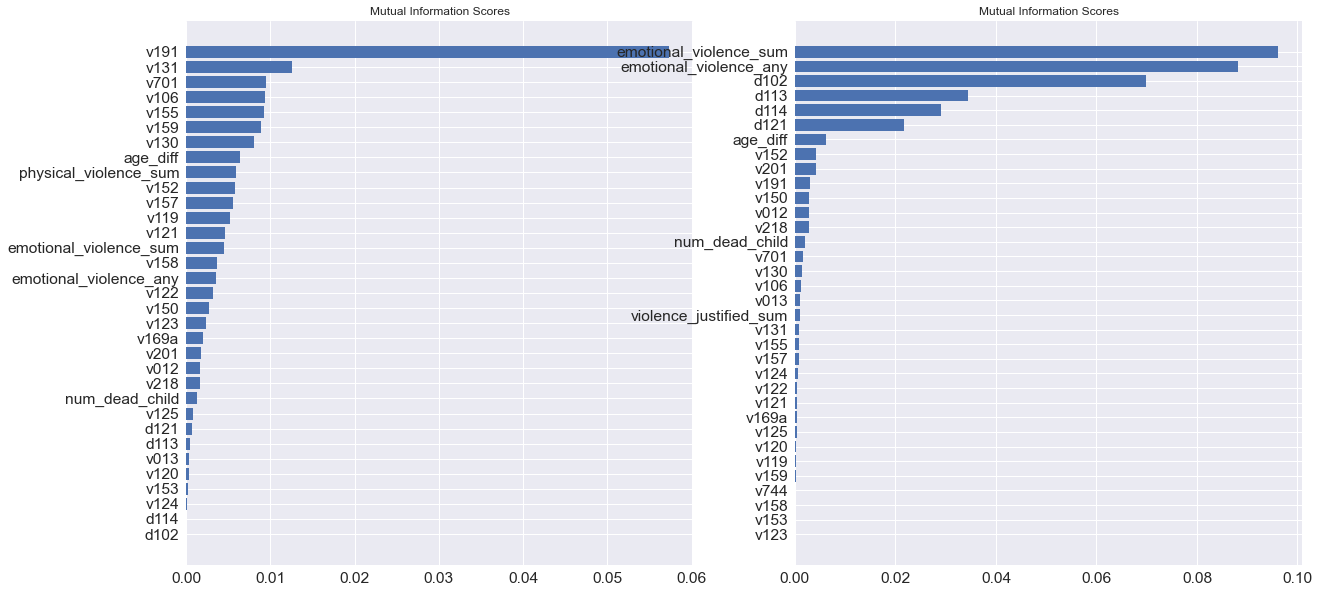

In [171]:
# plt.figure(dpi=100, figsize=(8, 5))
plt.subplot(121)
y = df[violence_justified]
y = y[df['v119']!=7]
this_X = X.drop(columns=["violence_justified_sum", violence_justified])
discrete_features = this_X.dtypes == 'int8'
mi_scores = make_mi_scores(this_X, y, discrete_features)
plot_mi_scores(mi_scores)

plt.subplot(122)
y = df[violence]
y = y[df['v119']!=7]
this_X = X.drop(columns=["physical_violence_sum"])
discrete_features = this_X.dtypes == 'int8'
mi_scores = make_mi_scores(this_X, y, discrete_features)
plot_mi_scores(mi_scores)

In [15]:
# Clean up missing values
# X.info()
for col in X.columns:
    print(col + ": ", X[col].unique())

v106:  [0 1 2 3]
v012:  [30 23 33 39 28 48 20 45 46 21 43 19 29 27 44 36 18 35 49 26 31 42 40 24
 25 17 16 22 15 34 38 37 32 41 47]
v013:  [4 2 5 3 7 6 1]
v155:  [0 2 1 3 4]
v157:  [0 2 1]
v158:  [1 0 2]
v159:  [1 0 2]
v119:  [1 0 7]
v120:  [1 0 7]
v121:  [0 1 7]
v122:  [0 7 1]
v123:  [0 1 7]
v125:  [0 7 1]
v124:  [0 1 7]
v153:  [0 7 1]
v169a:  [1 0]
v130:  [ 3  2 10  4  1  5  6  8  7  9]
v131:  [ 2  7  3 96  6 97  4  5  1  8]
v152:  [31 45 72 42 58 55 65 38 41 47 48 57 21 30 27 35 29 37 73 60 36 74 63 40
 78 43 51 62 86 24 23 52 50 68 46 32 34 28 33 53 59 25 85 71 22 44 49 67
 54 56 64 26 70 75 66 39 77 76 61 95 79 80 20 19 89 69 82 87 92 81 94 18
 17 90 83 84 16 91]
v150:  [ 2  9 10  4  3  5  6  8 12 11  1  7]
v191:  [-34116. -51108.  -8492. ...  69387.  43848.  81138.]
v201:  [ 2  5  4  3  6  1  7  8  0  9 12 10 14 11 13 16]
v218:  [ 2  5  4  3  1  7  6  0 11  9 12  8 10]
num_dead_child:  [0 1 2 3 5 4 9 6 7 8]
v701:  [0 1 2 3 8]


# Let's try prediction

In [260]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report

y = df[violence]
y = y[df['v119']!=7]
this_X = X.drop(columns=["physical_violence_sum"])


clf = DecisionTreeClassifier(max_depth=4)
# clf = GradientBoostingClassifier(max_depth=2, subsample=0.5, max_features=0.2, n_estimators=300, learning_rate=0.2)
# clf = RandomForestClassifier(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(this_X.values,y.values)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("f1_score:", classif_dict['True']['f1-score'])
classif_dict = classification_report(y_test,y_pred, output_dict=True)
print(classification_report(y_test,y_pred))

f1_score: 0.5138121546961325
              precision    recall  f1-score   support

       False       0.94      0.98      0.96      2514
        True       0.57      0.34      0.43       227

    accuracy                           0.92      2741
   macro avg       0.76      0.66      0.69      2741
weighted avg       0.91      0.92      0.92      2741



In [175]:
y_test

8581     False
9696     False
5809     False
14825    False
2742     False
         ...  
404      False
1275     False
2681     False
2824     False
15128    False
Name: violence, Length: 2741, dtype: bool

In [178]:
y_pred

array([False, False, False, ..., False, False, False])

In [180]:
np.sum(np.abs(y_test.values-y_pred))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [190]:
np.sum(y_test.values.astype(int) - y_pred.astype(int))

0